# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [27]:
import sys
# פקודה זו אומרת: קח את הפייתון הנוכחי שמריץ את המחברת, ותפעיל את pip שלו
!{sys.executable} -m pip install fastai

Defaulting to user installation because normal site-packages is not writeable


In [22]:
# ייבוא כל הפונקציות של fastai לראייה ממוחשבת
from fastai.vision.all import *

# הגדרת הנתיב לתיקייה שבה שמרת את התמונות
# אם אתה ב-Colab, תצטרך להעלות את התיקייה ל-Drive או לסביבה המקומית ולשנות את הנתיב בהתאם
path = Path('Dataset')

# בדיקה שהנתיב תקין ושיש בו תמונות
files = get_image_files(path)
print(f"Total images found: {len(files)}")

Total images found: 307


In [23]:
# הגדרת ה-DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),    # סוג הדאטה: תמונה -> קטגוריה
    get_items=get_image_files,             # איך משיגים את רשימת הקבצים
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # חלוקה ל-Train (80%) ו-Validation (20%)
    get_y=parent_label,                    # הליבל הוא שם התיקייה (fried_chicken או toy_poodle)
    item_tfms=Resize(128)                  # כיווץ כל התמונות לגודל אחיד (128x128)
)

Checking for corrupt images...
Found 0 corrupt images.


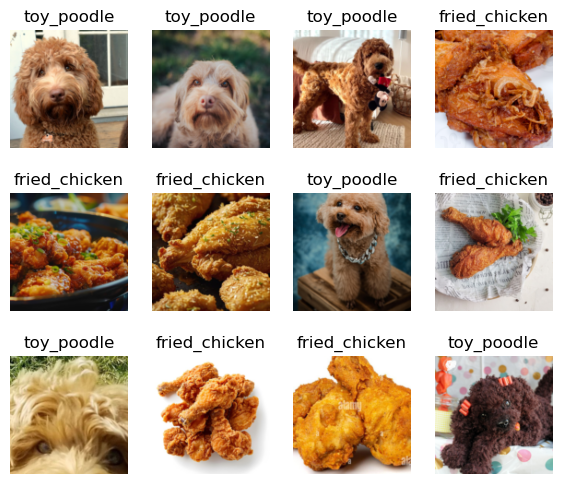

In [24]:
# 1. בדיקת תקינות לכל התמונות בנתיב
print("Checking for corrupt images...")
failed = verify_images(get_image_files(path))

print(f"Found {len(failed)} corrupt images.")

# 2. מחיקת הקבצים הפגומים (אם יש כאלה)
# הפונקציה map תפעיל את הפקודה unlink (מחיקה) על כל קובץ ברשימה
failed.map(Path.unlink)

# 3. חשוב מאוד: בנייה מחדש של ה-DataLoaders
# חייבים לעשות את זה כדי שהמערכת תדע שהקבצים האלו נמחקו ולא תנסה לגשת אליהם שוב
dls = dblock.dataloaders(path)

# 4. ניסיון חוזר להצגה
dls.show_batch(max_n=12, figsize=(7,6))

In [25]:
# 1. יצירת המודל (Learner)
# אנחנו משתמשים בארכיטקטורת resnet34 שהיא חזקה ומהירה
# המטריקה שלנו היא error_rate (אחוז השגיאה) - אנחנו רוצים שזה יהיה כמה שיותר נמוך
learn = vision_learner(dls, resnet34, metrics=error_rate)

# 2. אימון המודל (Fine Tuning)
# אנחנו מריצים 4 עידנים (epochs) - כלומר המודל יעבור על כל התמונות 4 פעמים
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.792909,1.173479,0.459016,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.139587,0.135192,0.049180,00:27
1,0.093366,0.016894,0.000000,00:26
2,0.068317,0.005613,0.000000,00:27
3,0.049810,0.003010,0.000000,00:28


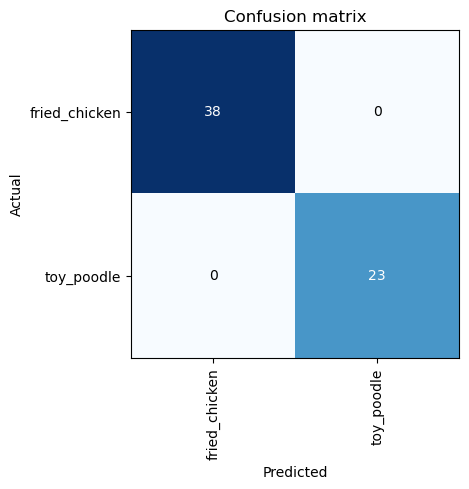

In [26]:
# 1. יצירת אובייקט לניתוח סיווג
interp = ClassificationInterpretation.from_learner(learn)

# 2. הצגת מטריצת הבלבול
interp.plot_confusion_matrix()